# Problem set 2

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [2]:
#file path
file = 'PS_2_Performance_Measurement.xlsx'

In [3]:
#import factors sheet
factors = pd.read_excel(file, sheet_name='factors', parse_dates=["date"], index_col="date")
factors.head()

,RF,Mkt-RF,SMB,HML,UMD
date,,,,,
1994-01-31,0.0025,0.0290,0.0011,0.0215,0.0009
1994-02-28,0.0021,-0.0263,0.0272,-0.0137,-0.0027
1994-03-31,0.0027,-0.0485,-0.0090,0.0129,-0.0131
1994-04-29,0.0027,0.0068,-0.0088,0.0166,0.0039
1994-05-31,0.0032,0.0062,-0.0205,0.0012,-0.0222


In [4]:
#import total_returns sheet
returns = pd.read_excel(file, sheet_name='total_returns', parse_dates=["date"], index_col="date")
returns.head()

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.011733,-0.005467,-0.016267,0.001433,0.001933,0.105133,0.036533,0.003333,0.012733,0.011133
1994-02-28,-0.025011,0.002106,0.019713,-0.056811,0.011667,-0.011705,-0.001850,0.001188,-0.020346,-0.041240
1994-03-31,-0.039114,-0.002514,0.071827,-0.042854,0.025923,-0.046227,-0.013051,-0.009758,-0.016930,-0.035777
1994-04-29,-0.015720,0.002397,0.012710,-0.016033,0.008437,-0.083673,-0.006673,-0.025332,-0.002165,-0.017542
1994-05-31,0.005550,-0.001229,0.022357,0.037839,0.007497,-0.007453,-0.001604,-0.010329,0.007780,0.022178


# Performance measures

In [5]:
# first we compute excess return
xrets = returns.sub(factors.loc[:,"RF"], axis=0)
xrets.head()

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.009233,-0.007967,-0.018767,-0.001067,-0.000567,0.102633,0.034033,0.000833,0.010233,0.008633
1994-02-28,-0.027111,0.000006,0.017613,-0.058911,0.009567,-0.013805,-0.003950,-0.000912,-0.022446,-0.043340
1994-03-31,-0.041814,-0.005214,0.069127,-0.045554,0.023223,-0.048927,-0.015751,-0.012458,-0.019630,-0.038477
1994-04-29,-0.018420,-0.000303,0.010010,-0.018733,0.005737,-0.086373,-0.009373,-0.028032,-0.004865,-0.020242
1994-05-31,0.002350,-0.004429,0.019157,0.034639,0.004297,-0.010653,-0.004804,-0.013529,0.004580,0.018978


In [6]:
#annualized arithmetic average
avg_rets = returns.mean() * 12
#format results
avg_rets.map("{:.2%}".format)

Ln/Sh Eq Hedge Fund USD       9.04%
Eq Mkt Ntr Hedge Fund USD     5.29%
Ded Sh Bs Hedge Fund USD     -2.66%
Global Mac Hedge Fund USD    11.51%
Mngd Fut Hedge Fund USD       6.13%
Emg Mkts Hedge Fund USD       7.99%
Evnt Drvn Hedge Fund USD      8.83%
Cnvrt Arb Hedge Fund USD      7.35%
Fx Inc Arb Hedge Fund USD     5.24%
DJCS Hedge Fund USD           8.41%
dtype: object

In [7]:
#annualized geometric average
T = len(returns) / 12
geo_average_returns = ((1+ returns).prod(axis=0).pow(1/T) - 1)
geo_average_returns.map("{:.2%}".format)

Ln/Sh Eq Hedge Fund USD       8.89%
Eq Mkt Ntr Hedge Fund USD     4.68%
Ded Sh Bs Hedge Fund USD     -4.01%
Global Mac Hedge Fund USD    11.63%
Mngd Fut Hedge Fund USD       5.59%
Emg Mkts Hedge Fund USD       7.08%
Evnt Drvn Hedge Fund USD      8.98%
Cnvrt Arb Hedge Fund USD      7.34%
Fx Inc Arb Hedge Fund USD     5.19%
DJCS Hedge Fund USD           8.44%
dtype: object

In [8]:
# annualized volatility of excess returns
vol = xrets.std() * np.sqrt(12)
vol.map("{:.2%}".format)

Ln/Sh Eq Hedge Fund USD       9.90%
Eq Mkt Ntr Hedge Fund USD    10.22%
Ded Sh Bs Hedge Fund USD     16.97%
Global Mac Hedge Fund USD     9.64%
Mngd Fut Hedge Fund USD      11.69%
Emg Mkts Hedge Fund USD      14.89%
Evnt Drvn Hedge Fund USD      6.29%
Cnvrt Arb Hedge Fund USD      6.90%
Fx Inc Arb Hedge Fund USD     5.73%
DJCS Hedge Fund USD           7.50%
dtype: object

In [9]:
# annualized Sharpe Ratio
sr = xrets.mean()/vol * 12
round(sr, 2)

Ln/Sh Eq Hedge Fund USD      0.61
Eq Mkt Ntr Hedge Fund USD    0.22
Ded Sh Bs Hedge Fund USD    -0.34
Global Mac Hedge Fund USD    0.88
Mngd Fut Hedge Fund USD      0.26
Emg Mkts Hedge Fund USD      0.33
Evnt Drvn Hedge Fund USD     0.92
Cnvrt Arb Hedge Fund USD     0.62
Fx Inc Arb Hedge Fund USD    0.38
DJCS Hedge Fund USD          0.72
dtype: float64

# Beta and alpha

In [10]:
# extract column names (i.e. index names)
index_names = xrets.columns

In [11]:
alpha = {}
beta = {}
ssr = {}

In [12]:
# iterate over all indices
for index in index_names:
    # get excess returns of the index
    y = xrets.loc[:,index]
    # x is the market factor
    x = factors.loc[:,"Mkt-RF"]
    # run linear time-series regression
    reg = sm.OLS(y, sm.add_constant(x)).fit()
    # get coefficients and update dictionaries
    alpha.update({index: reg.params.loc["const"] * 12})
    beta.update({index: reg.params.loc["Mkt-RF"]})
    ssr.update({index: reg.ssr})

In [13]:
alpha = pd.Series(alpha)
beta = pd.Series(beta)
ssr = pd.Series(ssr)

In [14]:
round(beta, 2)

Ln/Sh Eq Hedge Fund USD      0.46
Eq Mkt Ntr Hedge Fund USD    0.19
Ded Sh Bs Hedge Fund USD    -0.86
Global Mac Hedge Fund USD    0.15
Mngd Fut Hedge Fund USD     -0.07
Emg Mkts Hedge Fund USD      0.54
Evnt Drvn Hedge Fund USD     0.26
Cnvrt Arb Hedge Fund USD     0.17
Fx Inc Arb Hedge Fund USD    0.13
DJCS Hedge Fund USD          0.29
dtype: float64

In [15]:
alpha.map("{:.2%}".format)

Ln/Sh Eq Hedge Fund USD       3.19%
Eq Mkt Ntr Hedge Fund USD     1.08%
Ded Sh Bs Hedge Fund USD     -0.47%
Global Mac Hedge Fund USD     7.54%
Mngd Fut Hedge Fund USD       3.52%
Emg Mkts Hedge Fund USD       1.62%
Evnt Drvn Hedge Fund USD      4.18%
Cnvrt Arb Hedge Fund USD      3.25%
Fx Inc Arb Hedge Fund USD     1.41%
DJCS Hedge Fund USD           3.59%
dtype: object

In [16]:
# information ratio
ir = alpha / np.sqrt(ssr / len(xrets) * 12)
round(ir, 2)

Ln/Sh Eq Hedge Fund USD      0.49
Eq Mkt Ntr Hedge Fund USD    0.11
Ded Sh Bs Hedge Fund USD    -0.05
Global Mac Hedge Fund USD    0.81
Mngd Fut Hedge Fund USD      0.30
Emg Mkts Hedge Fund USD      0.14
Evnt Drvn Hedge Fund USD     0.91
Cnvrt Arb Hedge Fund USD     0.52
Fx Inc Arb Hedge Fund USD    0.27
DJCS Hedge Fund USD          0.62
dtype: float64

# Do not use excess returns to compute the price index / cumulative return

In [17]:
# cumulative returns 
cum_rets = (1 + returns).cumprod()
hwm = cum_rets.expanding().max() # we use expanding since we need hwm at specific point of time, not whole Series
dd = (hwm - cum_rets) / hwm

max_dd = dd.max()
max_dd.map("{:.2%}".format)

Ln/Sh Eq Hedge Fund USD      22.14%
Eq Mkt Ntr Hedge Fund USD    45.13%
Ded Sh Bs Hedge Fund USD     64.24%
Global Mac Hedge Fund USD    27.00%
Mngd Fut Hedge Fund USD      17.88%
Emg Mkts Hedge Fund USD      45.33%
Evnt Drvn Hedge Fund USD     19.30%
Cnvrt Arb Hedge Fund USD     33.00%
Fx Inc Arb Hedge Fund USD    29.10%
DJCS Hedge Fund USD          19.82%
dtype: object

In [18]:
# skewness of monthly excess returns
skewness = xrets.skew()
round(skewness, 2)

Ln/Sh Eq Hedge Fund USD      -0.07
Eq Mkt Ntr Hedge Fund USD   -11.99
Ded Sh Bs Hedge Fund USD      0.65
Global Mac Hedge Fund USD    -0.10
Mngd Fut Hedge Fund USD       0.02
Emg Mkts Hedge Fund USD      -0.81
Evnt Drvn Hedge Fund USD     -2.24
Cnvrt Arb Hedge Fund USD     -2.57
Fx Inc Arb Hedge Fund USD    -4.23
DJCS Hedge Fund USD          -0.27
dtype: float64

In [19]:
# kurtosis
kurtosis = xrets.kurt()
round(kurtosis, 2)

Ln/Sh Eq Hedge Fund USD        3.20
Eq Mkt Ntr Hedge Fund USD    165.33
Ded Sh Bs Hedge Fund USD       1.31
Global Mac Hedge Fund USD      3.90
Mngd Fut Hedge Fund USD       -0.03
Emg Mkts Hedge Fund USD        5.14
Evnt Drvn Hedge Fund USD      11.38
Cnvrt Arb Hedge Fund USD      15.82
Fx Inc Arb Hedge Fund USD     29.38
DJCS Hedge Fund USD            2.44
dtype: float64

In [20]:
# formatting
# this list contains the row names (index of pandas DataFrame)
names = ["Ann. arith. ave. ret", "Ann. geo. ave. ret", "Ann. volatility", 
         "Ann. Sharpe ratio", "Market beta", "Ann. alpha to MKT", "Ann. IR", 
         "Max drawdown", "Skewness", "Excess kurtosis"]

#list of pandas series 
stats = [avg_rets, geo_average_returns, vol, sr, beta,
        alpha, ir, max_dd, skewness, kurtosis]

#create a dataframe
stats = pd.DataFrame(stats, index = names)

# format certain columns in percent
for row in [0, 1, 2, 5, 7]: stats.iloc[row, :] = stats.iloc[row, :].map("{:.2%}".format)

# round certain columns to floats with two decimals
for row in [3, 4, 6, 8, 9]: stats.iloc[row, :] = stats.iloc[row, :].map("{:.2f}".format)
    
stats

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
Ann. arith. ave. ret,9.04%,5.29%,-2.66%,11.51%,6.13%,7.99%,8.83%,7.35%,5.24%,8.41%
Ann. geo. ave. ret,8.89%,4.68%,-4.01%,11.63%,5.59%,7.08%,8.98%,7.34%,5.19%,8.44%
Ann. volatility,9.90%,10.22%,16.97%,9.64%,11.69%,14.89%,6.29%,6.90%,5.73%,7.50%
Ann. Sharpe ratio,0.61,0.22,-0.34,0.88,0.26,0.33,0.92,0.62,0.38,0.72
Market beta,0.46,0.19,-0.86,0.15,-0.07,0.54,0.26,0.17,0.13,0.29
Ann. alpha to MKT,3.19%,1.08%,-0.47%,7.54%,3.52%,1.62%,4.18%,3.25%,1.41%,3.59%
Ann. IR,0.49,0.11,-0.05,0.81,0.30,0.14,0.91,0.52,0.27,0.62
Max drawdown,22.14%,45.13%,64.24%,27.00%,17.88%,45.33%,19.30%,33.00%,29.10%,19.82%
Skewness,-0.07,-11.99,0.65,-0.10,0.02,-0.81,-2.24,-2.57,-4.23,-0.27
Excess kurtosis,3.20,165.33,1.31,3.90,-0.03,5.14,11.38,15.82,29.38,2.44


# Eq Mkt Ntr HF stands out

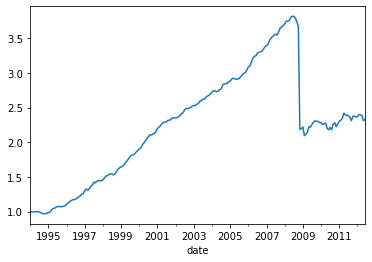

In [21]:
cum_rets.loc[:, "Eq Mkt Ntr Hedge Fund USD"].plot();

# 2.2 Cumulative return and drawdown*

In [22]:
cum_rets

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,1.011733,0.994533,0.983733,1.001433,1.001933,1.105133,1.036533,1.003333,1.012733,1.011133
1994-02-28,0.986429,0.996628,1.003126,0.944541,1.013623,1.092197,1.034616,1.004526,0.992129,0.969434
1994-03-31,0.947846,0.994122,1.075177,0.904064,1.039899,1.041708,1.021113,0.994723,0.975332,0.934751
1994-04-29,0.932946,0.996506,1.088843,0.889569,1.048673,0.954545,1.014299,0.969525,0.973220,0.918354
1994-05-31,0.938124,0.995281,1.113187,0.923230,1.056535,0.947431,1.012673,0.959511,0.980792,0.938721
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,5.048153,2.400721,0.460273,7.793135,2.843154,3.711433,4.953850,3.717730,2.488409,4.555331
2012-03-30,5.073386,2.396992,0.454041,7.759852,2.758860,3.685409,4.992804,3.738310,2.506766,4.557510
2012-04-30,5.049642,2.387072,0.442543,7.740286,2.770720,3.690908,4.981324,3.729408,2.523987,4.555582


In [23]:
dd

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994-02-28,0.025011,0.000000,0.000000,0.056811,0.000000,0.011705,0.001850,0.000000,0.020346,0.041240
1994-03-31,0.063147,0.002514,0.000000,0.097231,0.000000,0.057392,0.014877,0.009758,0.036932,0.075542
1994-04-29,0.077874,0.000123,0.000000,0.111704,0.000000,0.136262,0.021450,0.034843,0.039016,0.091758
1994-05-31,0.072756,0.001351,0.000000,0.078092,0.000000,0.142700,0.023020,0.044811,0.031539,0.071615
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,0.049735,0.371432,0.628099,0.000000,0.059759,0.042333,0.088816,0.000000,0.000000,0.025914
2012-03-30,0.044985,0.372408,0.633135,0.004271,0.087635,0.049048,0.081651,0.000000,0.000000,0.025448
2012-04-30,0.049454,0.375005,0.642425,0.006782,0.083713,0.047629,0.083763,0.002381,0.000000,0.025860


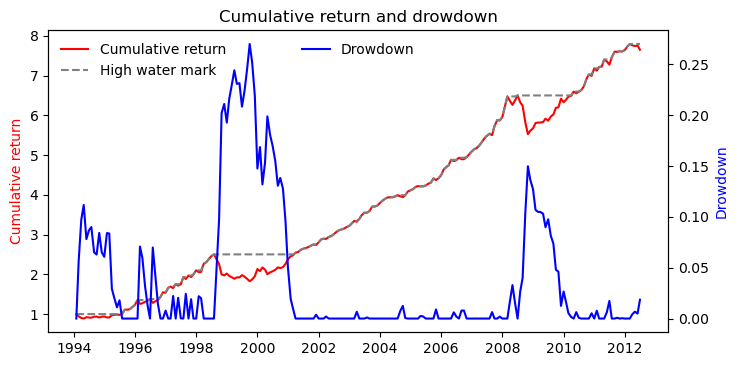

In [24]:
# define our variables
fund_name = "Global Mac Hedge Fund USD"

x = cum_rets.index
y1 = cum_rets.loc[:, fund_name]
y2 = cum_rets.loc[:, fund_name].expanding().max()
y3 = dd.loc[:, fund_name]

#create a figure with one graph
fig, ax1 = plt.subplots(figsize=(8,4), dpi=100)

# make a twin of the graph with the same x axis
ax2 = ax1.twinx()

# set names for the y axis
ax1.set_ylabel("Cumulative return",color="red")
ax2.set_ylabel("Drowdown",color="blue")

# set title for plot
plt.title("Cumulative return and drowdown")

# plot the two graphs
ax1.plot(x, y1, label="Cumulative return", color="r")
ax1.plot(x, y2, label="High water mark", color="grey", ls='--')
ax2.plot(y3, label="Drowdown", color="b")

# adding a legend
ax1.legend(loc="upper left", frameon=False)
ax2.legend(loc="upper center", frameon=False)

# show the whole plot
plt.show()

# 2.3 Factor models*

Univariet regression

In [25]:
fund_name = "Ln/Sh Eq Hedge Fund USD"

In [26]:
y = xrets.loc[:, fund_name]
x = factors.loc[:, "Mkt-RF"]

uv_regression = sm.OLS(y, sm.add_constant(x)).fit()
uv_alpha = uv_regression.params.loc["const"] * 12 * 100
uv_alpha = round(uv_alpha, 2)

Multivarient regression

In [27]:
x = factors.loc[:,["Mkt-RF", "SMB", "HML", "UMD"]]

mv_regression = sm.OLS(y, sm.add_constant(x)).fit()
mv_alpha = mv_regression.params.loc["const"] * 12 * 100
mv_alpha = round(mv_alpha, 2)

Regression result

In [28]:
table = Stargazer([uv_regression, mv_regression])
table.add_line("Annualized Alpha (in %)", [uv_alpha, mv_alpha])
table.covariate_order(["const", "Mkt-RF", "SMB", "HML", "UMD"])
table

# 2.4 Illiquidity and stale prices*

In [29]:
# univariate regression 
fund_name = "Cnvrt Arb Hedge Fund USD"
y = xrets.loc[:, fund_name]
x = factors.loc[:, "Mkt-RF"]

regression = sm.OLS(y, sm.add_constant(x)).fit()
alpha = regression.params.loc["const"] * 12 * 100
beta = regression.params.loc["Mkt-RF"]

print("Monthly regression")
print("------------------")
print(f"Alpha: {round(alpha, 2)}%")
print(f"Beta: {round(beta, 2)}")

Monthly regression
------------------
Alpha: 3.25%
Beta: 0.17


In [30]:
# univariate regression using 3-month excess returns

y = xrets.loc[:, fund_name].rolling(3).sum().dropna()
x = factors.loc[:, "Mkt-RF"].rolling(3).sum().dropna()

regression_3m = sm.OLS(y, sm.add_constant(x)).fit()
alpha_3m = regression_3m.params.loc["const"] * 4 * 100  # by 4!!!!!
beta_3m = regression_3m.params.loc["Mkt-RF"]

print("Quarterly regression")
print("--------------------")
print(f"Alpha: {round(alpha_3m, 2)}%")
print(f"Beta: {round(beta_3m, 2)}")

Quarterly regression
--------------------
Alpha: 2.5%
Beta: 0.3


In [31]:
# the 1-month lagged market, and the 2-month lagged market

In [32]:
cba_rets = xrets.loc[:, fund_name]
mkt_factor = factors.loc[:, "Mkt-RF"]

In [34]:
# use pd.Series.shift(x)
x = pd.DataFrame([mkt_factor, mkt_factor.shift(1), mkt_factor.shift(2)]).T
y = cba_rets

regression_lag = sm.OLS(y, sm.add_constant(x), missing="drop").fit()

alpha_lag = regression_lag.params.loc["const"] * 12 * 100
beta_lag = regression_lag.params.loc["Mkt-RF"]

print("Regression with two market lags:")
print("--------------------------------")
print(f"Alpha: {round(alpha_lag, 2)}%")
print(f"Beta: {round(beta_lag.sum(), 2)}")

Regression with two market lags:
--------------------------------
Alpha: 2.39%
Beta: 0.32


In [35]:
ssr

Ln/Sh Eq Hedge Fund USD      0.077392
Eq Mkt Ntr Hedge Fund USD    0.174337
Ded Sh Bs Hedge Fund USD     0.171993
Global Mac Hedge Fund USD    0.160047
Mngd Fut Hedge Fund USD      0.249362
Emg Mkts Hedge Fund USD      0.263849
Evnt Drvn Hedge Fund USD     0.038947
Cnvrt Arb Hedge Fund USD     0.072975
Fx Inc Arb Hedge Fund USD    0.052427
DJCS Hedge Fund USD          0.062139
dtype: float64

In [36]:
alpha

3.2496869131036563